In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [ ]:
# by Ethan Chu!

In [2]:
df = pd.read_csv('video_games_sales.csv')
df = df.dropna()
df = df.drop(columns = ['name'])

In [3]:
df.dtypes

rank              int64
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

## **Business Question: How do we maximize sales of video games (from the perspective of Nintendo)?**

What genre of video games should we make? On what platform? Perhaps we should do some remakes of classics?

In [4]:
df = df[df['publisher'] == 'Nintendo']
df

,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16269,16272,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


### **Visualizations!**

In [5]:
console_order = ['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', 'Wii', '3DS', 'WiiU']

In [6]:
grouped = df.groupby(by = 'platform')
total_sum_by_console = grouped['global_sales'].sum()
total_sales_df = pd.DataFrame({'global_sales': total_sum_by_console})
total_sales_df

,global_sales
platform,
3DS,156.45
DS,349.10
GB,229.06
GBA,112.00
GC,79.15
N64,129.62
NES,183.97
SNES,96.84
Wii,390.34


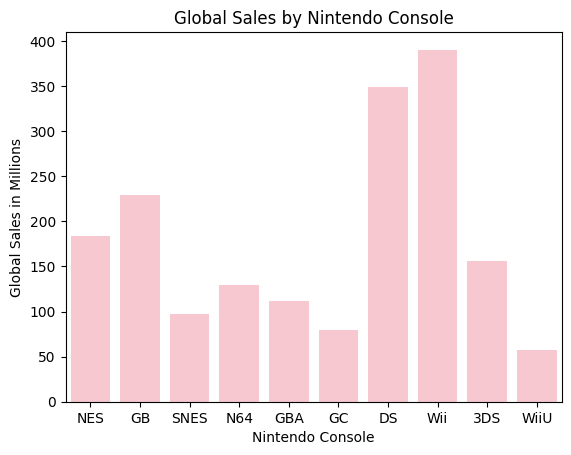

In [7]:
sns.barplot(x = 'platform', y = 'global_sales', data = total_sales_df, color = 'pink', order = console_order)
plt.title('Global Sales by Nintendo Console')
plt.xlabel('Nintendo Console')
plt.ylabel('Global Sales in Millions')
plt.show()

In [8]:
avg_by_console = grouped['global_sales'].mean()
avg_df = pd.DataFrame({'avg': avg_by_console})
avg_df

,avg
platform,
3DS,1.907927
DS,2.342953
GB,3.817667
GBA,1.230769
GC,1.493396
N64,2.196949
NES,4.088222
SNES,2.690000
Wii,4.819012


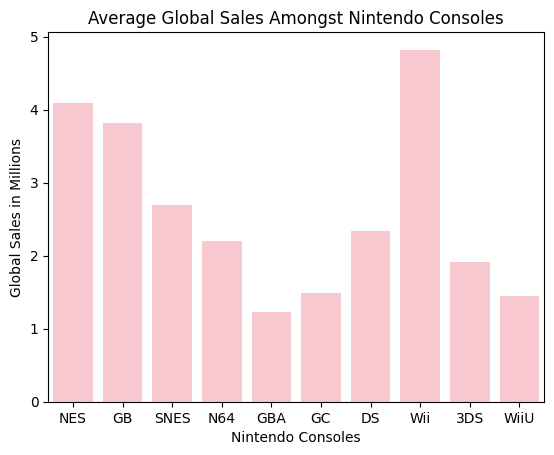

In [9]:
sns.barplot(x = 'platform', y = 'avg', data = avg_df, color = 'pink', order = console_order)
plt.title('Average Global Sales Amongst Nintendo Consoles')
plt.xlabel('Nintendo Consoles')
plt.ylabel('Global Sales in Millions')
plt.show()

### **Insights:**
- The Wii is the most successful Nintendo console both in global sales and in average global sales.
- Although the DS rivals the Wii in global sales, it pales in average global sales, suggesting that there were a few very very successful games on the DS, but for the Wii, Nintendo was releasing smash hit after smash hit.
- Although the 3DS and WiiU seem to be less successful, it is also tough to perform well after a huge global success such as the Wii.
    - Also, being the most recent Nintendo consoles, their sales are probably still climbing steadily as newer games continue to be released on such systems.

## **Hypothesis Testing!**
Is the difference between the average global sales of the Wii different from the average global sales of the NES?

$H_0: \mu_1 - \mu_2 = 0$ where $\mu_1$ is the average global sales of the Wii and $\mu_2$ is the average global sales of the NES

$H_a: \mu_1 - \mu_2 \neq 0$

Going to use this dataset to estimate the population parameters because datasets are subsets of the population!

In [10]:
# create subsets for Wii and NES since those are the consoles we care about
wii = df[df['platform'] == 'Wii']
nes = df[df['platform'] == 'NES']

wii_mean = wii['global_sales'].mean()
wii_stdev = wii['global_sales'].std()
wii_sample_size = len(wii)
nes_mean = nes['global_sales'].mean()
nes_stdev = nes['global_sales'].std()
nes_sample_size = len(nes)

print('Wii mean: ', wii_mean)
print('Wii standard deviation: ', wii_stdev)
print('Wii sample size: ', wii_sample_size)
print('NES mean: ', nes_mean)
print('NES standard deviation: ', nes_stdev)
print('NES sample size: ', nes_sample_size)

Wii mean:  4.819012345679012
Wii standard deviation:  11.608786392743458
Wii sample size:  81
NES mean:  4.088222222222222
NES standard deviation:  7.226626677178858
NES sample size:  45


### **Conditions!**
1. Sample of Wii games is randomly selected
2. $n_{Wii}$ < 10% of all Wii games
3. Sample of NES games is randomly selected
4. $n_{NES}$ < 10% of all NES games
5. $n_{Wii}$ = 84 > 30
6. $n_{NES}$ = 45 > 30
7. The two samples are independent of each other

In [11]:
point_estimate = wii_mean - nes_mean
standard_error = np.sqrt(((wii_stdev ** 2) / wii_sample_size) + ((nes_stdev ** 2) / nes_sample_size))
test_statistic = point_estimate / standard_error

degrees_freedom = min(wii_sample_size - 1, nes_sample_size - 1)

p_val = 2 * (1 - t.cdf(np.abs(test_statistic), df = degrees_freedom))
print('p-value: ', p_val)

p-value:  0.6657976899155496


### **Conclusion**
Using an $\alpha$ value of 0.05, our p-value is way higher. Because our p-value is super high, we fail to reject the null hypothesis, so we do not have statistically significant evidence to suggest that there is a difference between the average global sales of Wii games and the average global sales of NES games.

## **Confidence Interval**

Let's construct a 99% confidence interval for the difference in means between average global sales of the Wii and average global sales of the NES!

In [12]:
t_star = t.ppf(0.995, df = degrees_freedom)
lower_bound = point_estimate - t_star * standard_error
upper_bound = point_estimate + t_star * standard_error

print(f'Confidence Interval: ({lower_bound}, {upper_bound})')

Confidence Interval: (-3.7937502417844424, 5.255330488698023)


Since 0 is included within the bounds of the confidence interval, we do not have statistically significant evidence to suggest that there is a difference between the average global sales of Wii games and the average global sales of NES games.

### **Insights From Statistical Testing**

1. We do not have enough evidence to suggest that the mean global sales between the Wii and NES are different
2. In order to maximize profit, Nintendo should look to these systems to evaluate what made them so successful
    - for example, we can look at the games that launched with the console release (if these games were well received, perhaps people would be more receptive to buying more games on these consoles, since people already have the idea that games on this console are "good")
        - if a console releases with mediocre games / games that were not well-received, the public may write off the entire console as a failure, ultimately leading to lower sales
    - study what made these consoles different from the others, were they family-oriented? were they individual-oriented?
        - these systems being marketed towards a family audience would make sense to why they were so successful, Nintendo is a family-centric business, which would help explain why these systems did better than the consoles that were more geared towards individuals, such as the DS, GB, and 3DS
    - perhaps the gap in time is significant here, the NES was released way before the Wii, almost as if the Wii is the NES's generational successor, perhaps Nintendo can take advantage of the next generation's "nostalgia"
        - to clarify, since the Wii was so successful, perhaps Nintendo can wait until people who grew up playing games on the Wii grew up to be active consumers, then release "nostalgic" games that are reminiscent of the Wii, ultimately using nostalgia to drive sales

## **So What Games Should Nintendo Release with their Next System to Maximize Profit?**

In [13]:
median = df['global_sales'].median()

In [14]:
def categorize_risk(sales):
    if sales >= median:
        return 'low'
    else:
        return 'high'

In [15]:
def categorize_decade(year):
    if str(year // 10)[1] == '9':
        string = '19'
        return string + f'{int(year % 100):02d}'[0] + '0\'s'
    elif str(year // 10)[1] == '0':
        string = '20'
        return string + f'{int(year % 100):02d}'[0] + '0\'s'

In [16]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC',
       'WiiU'], dtype=object)

In [17]:
handhelds = ['GB', 'GBA', 'DS', '3DS']
family = ['Wii', 'NES', 'SNES', 'N64', 'GC', 'WiiU']
def categorize_platform(platform):
    if platform in handhelds:
        return 'handheld'
    elif platform in family:
        return 'family'

In [18]:
df['risk'] = df['global_sales'].apply(categorize_risk)
df['decade'] = df['year'].apply(categorize_decade)
df['console_type'] = df['platform'].apply(categorize_platform)
df['na_share'] = df['na_sales'] / df['global_sales']
df['jp_share'] = df['jp_sales'] / df['global_sales']
df['eu_share'] = df['eu_sales'] / df['global_sales']
df['risk'].value_counts()

risk
low     349
high    347
Name: count, dtype: int64

In [19]:
ct = make_column_transformer(
    (OneHotEncoder(sparse_output = False), ['genre', 'platform', 'console_type', 'decade']),
    (OrdinalEncoder(), ['risk']),
    remainder = 'passthrough'
)

ct.set_output(transform = 'pandas')
df = ct.fit_transform(df)

In [20]:
for index, column in enumerate(ct.get_feature_names_out()):
    print(index, column)

0 onehotencoder__genre_Action
1 onehotencoder__genre_Adventure
2 onehotencoder__genre_Fighting
3 onehotencoder__genre_Misc
4 onehotencoder__genre_Platform
5 onehotencoder__genre_Puzzle
6 onehotencoder__genre_Racing
7 onehotencoder__genre_Role-Playing
8 onehotencoder__genre_Shooter
9 onehotencoder__genre_Simulation
10 onehotencoder__genre_Sports
11 onehotencoder__genre_Strategy
12 onehotencoder__platform_3DS
13 onehotencoder__platform_DS
14 onehotencoder__platform_GB
15 onehotencoder__platform_GBA
16 onehotencoder__platform_GC
17 onehotencoder__platform_N64
18 onehotencoder__platform_NES
19 onehotencoder__platform_SNES
20 onehotencoder__platform_Wii
21 onehotencoder__platform_WiiU
22 onehotencoder__console_type_family
23 onehotencoder__console_type_handheld
24 onehotencoder__decade_1980's
25 onehotencoder__decade_1990's
26 onehotencoder__decade_2000's
27 onehotencoder__decade_2010's
28 ordinalencoder__risk
29 remainder__rank
30 remainder__year
31 remainder__publisher
32 remainder__na_sa

In [21]:
trials = []

X = df.iloc[ : , 0:28]
X = pd.concat([X, df.iloc[ : , 37 : ]], axis = 1)
y = df['ordinalencoder__risk']

for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    rf = RandomForestClassifier(n_estimators = 1000,
                                criterion = 'entropy',
                                min_samples_split = 40,
                                max_depth = 15,
                                class_weight = 'balanced'
                                )
    rf.fit(X_train, y_train)

    feature_importances = dict(zip(X.columns, rf.feature_importances_))
    feature_importances['score'] = rf.score(X_test, y_test)
    trials.append(feature_importances)

trial_df = pd.DataFrame(trials)
    

In [22]:
accuracies = []
for col in trial_df.columns:
    accuracies.append((trial_df[col].median(), col))
accuracies.sort()
accuracies

[(np.float64(0.002474706984881993), 'onehotencoder__genre_Fighting'),
 (np.float64(0.002714282535961501), 'onehotencoder__platform_3DS'),
 (np.float64(0.002795974509006328), 'onehotencoder__genre_Shooter'),
 (np.float64(0.003293099811112022), 'onehotencoder__genre_Simulation'),
 (np.float64(0.0033467089453809943), 'onehotencoder__platform_GC'),
 (np.float64(0.003997355648656642), 'onehotencoder__genre_Action'),
 (np.float64(0.004247893682824133), 'onehotencoder__genre_Racing'),
 (np.float64(0.004936641471504048), 'onehotencoder__platform_Wii'),
 (np.float64(0.0050891073852683865), 'onehotencoder__genre_Sports'),
 (np.float64(0.005836454669859844), 'onehotencoder__platform_WiiU'),
 (np.float64(0.005906385377699592), 'onehotencoder__genre_Role-Playing'),
 (np.float64(0.0062814892846449494), 'onehotencoder__genre_Puzzle'),
 (np.float64(0.006430911598443867), 'onehotencoder__platform_N64'),
 (np.float64(0.007608967231772989), 'onehotencoder__genre_Misc'),
 (np.float64(0.007806074577485151)

In [23]:
trial_df

,onehotencoder__genre_Action,onehotencoder__genre_Adventure,onehotencoder__genre_Fighting,onehotencoder__genre_Misc,onehotencoder__genre_Platform,onehotencoder__genre_Puzzle,onehotencoder__genre_Racing,onehotencoder__genre_Role-Playing,onehotencoder__genre_Shooter,onehotencoder__genre_Simulation,...,onehotencoder__console_type_family,onehotencoder__console_type_handheld,onehotencoder__decade_1980's,onehotencoder__decade_1990's,onehotencoder__decade_2000's,onehotencoder__decade_2010's,remainder__na_share,remainder__jp_share,remainder__eu_share,score
0,0.004164,0.012699,0.002307,0.006712,0.021612,0.006416,0.008839,0.005732,0.002165,0.002553,...,0.007375,0.008365,0.029039,0.026269,0.012571,0.012752,0.255031,0.243127,0.204507,0.842857
1,0.003743,0.011191,0.002970,0.006320,0.013728,0.008578,0.005448,0.006593,0.002298,0.003285,...,0.008426,0.007645,0.043759,0.027416,0.015766,0.011563,0.243095,0.236479,0.211812,0.821429
2,0.003873,0.010112,0.001719,0.009706,0.019108,0.006262,0.004245,0.006040,0.002793,0.002855,...,0.009947,0.010992,0.034654,0.020980,0.020684,0.010195,0.249540,0.239155,0.208605,0.800000
3,0.004048,0.008919,0.002410,0.007994,0.015856,0.006326,0.002871,0.005075,0.003008,0.004847,...,0.010531,0.011075,0.041398,0.021931,0.012950,0.013347,0.245520,0.239536,0.211819,0.814286
4,0.003882,0.012827,0.002443,0.009385,0.019731,0.008606,0.005019,0.006968,0.002831,0.003226,...,0.007495,0.007812,0.035118,0.028214,0.015585,0.014561,0.248105,0.238577,0.203526,0.807143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004814,0.017263,0.002113,0.006847,0.029810,0.004127,0.004641,0.004871,0.003050,0.003580,...,0.008267,0.008190,0.036974,0.033833,0.013938,0.012681,0.258755,0.224709,0.200483,0.850000
96,0.004730,0.012170,0.002979,0.007473,0.019229,0.012979,0.005149,0.003822,0.002787,0.003676,...,0.009721,0.010586,0.033681,0.019669,0.013535,0.012862,0.243287,0.245898,0.211361,0.800000
97,0.004736,0.013065,0.002160,0.008190,0.013925,0.007199,0.003636,0.006023,0.003063,0.003512,...,0.008988,0.008533,0.042359,0.026187,0.015427,0.015366,0.237903,0.241917,0.212484,0.850000
98,0.003898,0.019354,0.002620,0.005672,0.024044,0.007343,0.004007,0.007413,0.003181,0.003039,...,0.007709,0.008285,0.033452,0.025831,0.017837,0.011266,0.247976,0.237200,0.211114,0.850000


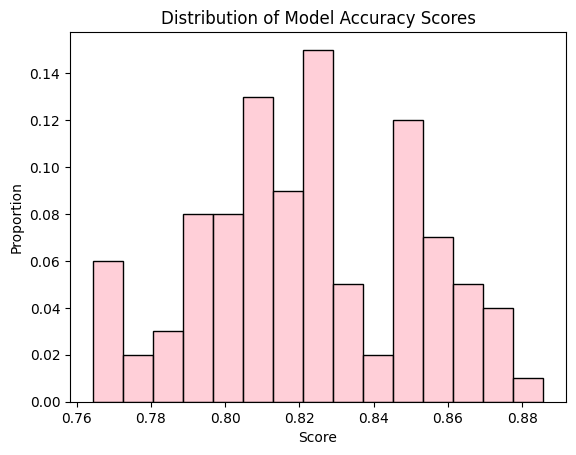

In [24]:
sns.histplot(x = 'score', data = trial_df, bins = 15, color = 'pink', stat = 'proportion')
plt.xlabel('Score')
plt.ylabel('Proportion')
plt.title('Distribution of Model Accuracy Scores')
plt.show()